# Normality Tests and Data Transformation
Many statistical tests and analyzes require on a Normal distribtuion of data. A really good example is given by Aaron Brown (https://www.quora.com/What-are-some-useful-applications-of-Box-Cox-transformations) with respect to looking at income inequality, where the standard deviation of a "heavy" tailed skewed distribution of household. The skewness is a measure of income inequality from one year to the next. But, the data needs to be transformed to a Normal distribution before the standard deviation can be measured.
- This Jupyter Notebook looks at different methods for testing a distribution for nomality and if needed, transforming the data to Normal using the **Power-Normal** distribution, aka, **Box-Cox**
- Testing a distribution for normality can be accomplished in at least three ways:
    1. Visual graphic inspection of the data: histograms, pdf, box and wisker, Quantile-Quantile (Q-Q) plots
    2. Descriptive statistics of the data: The mean, median and mode of the data should be essentially the same
    3. Numeric tests, e.g. Shapiro: https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411
    
If the data is not Normal, a transformation is used
- <u>**Box-Cox Transformation**</u> David Box and George Cox (1964) method solves for an exponent (lambda) that transforms a skewed distribution to normality
- y(λ) = (yλ – 1) / λ  if y ≠ 0
- y(λ) = log(y)  if y = 0

This Jupyter Notebook looks at different methods for testing a distribution for nomality and if needed, transforming the data to Normal using the **Power-Normal** distribution, aka, **Box-Cox**

## Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14}) # Global command must set in top


## Create Some Distributions to Transform and Test for Normality

### Set the bounds and most-likely values for creating distributions
- **Tested a normal, skewed, strongly skewed and lognormal distributions**
- Normal: 75-100-125 ( for normal or Beta symmetrical)
- Skewed: 75-100-200 (slightly asymmetrical Beta)
- Stronly Skewed: 75-100-500 (strongly asymmetrical Beta)
- Lognormal: 25-250-1650

In the cell below, specify the type of random values to test:
- nvals (normal random values)
- bvals (Beta Distribution random values)
    - L is the beta dispersion factor, L=10 is roughly normal, L < 10 increases dispersion
- lnvals (Lognormal random values)


In [2]:
# Inputs
dist_type='bvals'      # Specify which distribution random values to use, i.e., nvals, bvals or lnvals
min=75                 # Minimum Value 
ml=100                 # Most-Likely Value
max=200                # Maximum Value
size=1000              # Some Statistical Normality Tests may not be accurate for >5000 trials
L = 10                 # Beta distribution dispersion factor

### Create a function for Descriptive Statistics

In [3]:
# Create a function to do descriptive statistics
def my_stats(var):
    import numpy as np
    from scipy.stats import skew
    from scipy.stats import kurtosis
    from scipy import stats
    print('Descriptive Statistics')
    print('mean:   ','{: .4f}'.format(np.mean(var)))
    print('sem:    ','{: .4f}'.format(stats.sem(var)))
    print('median: ','{: .4f}'.format(np.median(var)))
    print('min:    ','{: .4f}'.format(np.min(var)))
    print('max:    ','{: .4f}'.format(np.max(var)))
    print('stdev:  ','{: .4f}'.format(np.std(var)))
    print('skew:   ','{: .4f}'.format(skew(var)))
    print('kurt:   ','{: .4f}'.format(kurtosis(var)))
    print('p05:    ','{: .4f}'.format(np.percentile(var,5)))
    print('p50:    ','{: .4f}'.format(np.percentile(var,50)))
    print('p95:    ','{: .4f}'.format(np.percentile(var,95)))
    print('Count   ','{: .0f}'.format(np.size(var)))

### Beta-PERT Distribution
The Beta-PERT distribution is an easy method for generating a bounded distribution from the Min, ML and Max values assigned above. It has two shape parameters:
- 𝛼 and 𝛽 are shape parameters, where 𝜆 is a dispersion factor: 𝜆=10 approximates the normal distribution. Smaller values (𝜆 < 10) increase the spread with .01 approximating a uniform distribution. 𝜆 > 10 decreases the spread of the distribution, 𝜆 = 4 is equivalent to the older versions of the Beta-PERT method.
𝛼=1+ 𝜆 * (mode - min) / (max - min)
𝛽=1+ 𝜆 * (max - mode) / (max - min)
- For modeling scipy's beta PDF inputs are:
    - 𝛼 , 𝛽, loc (lower limit), scale (upper limit - lower limit)
    
A normal distribution is also created for comparison

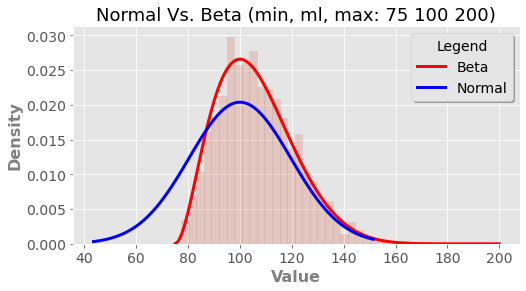

Beta Distribution shape parameters, alpha and beta:  3.0 9.0 

Beta Distribution
Descriptive Statistics
mean:     106.6905
sem:      0.4676
median:   104.8469
min:      77.3194
max:      164.9064
stdev:    14.7804
skew:     0.5539
kurt:     0.1028
p05:      85.1881
p50:      104.8469
p95:      133.6233
Count     1000


In [4]:
# Beta Distribution
from scipy.stats import beta
from scipy.stats import norm

amin = min
bml =  ml
cmax = max
L = L

a = 1 + L * (bml-amin)/(cmax-amin)
b = 1 + L * (cmax-bml)/(cmax-amin)

# Beta Distribution
bx = np.linspace(amin, cmax, 100)
by = beta.pdf(bx, a, b, loc=amin, scale=cmax-amin)
bvals =beta.rvs(a, b, loc=amin, scale=cmax-amin, size=size, random_state=None)

# Normal Distribution for comparison
# Using the "Range Rule" to estimate the standard deviation
nstd = (max-min) / (3*np.sqrt(np.log(size))-1.5)                        # Range-Rule
nvals = norm.rvs(loc=ml, scale=nstd, size=size, random_state=None)
nx = np.linspace(np.min(nvals), np.max(nvals), 100)
ny=norm.pdf(nx, ml, nstd)

fig = plt.figure(figsize=(8,4))
plt.plot(bx, by, lw=3, c='r', label="Beta")
plt.plot(nx, ny, lw=3, c='b', label="Normal")
plt.hist(bvals, bins=30, edgecolor='gray', density=True, alpha=.2)
plt.title('Normal Vs. Beta (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.legend(loc="upper right", fontsize=14, title='Legend', shadow=True)
plt.show()

# Print Descriptive Statistics
print('Beta Distribution shape parameters, alpha and beta: ', np.round(a,1),np.round(b), '\n')
print('Beta Distribution')
my_stats(bvals)

### Lognormal Distribution
Fitting a lognormal distribution to the Min-ML-Max values is not as simple as one would think. The key parameters for the distribution are shape, locations (loc) and Scale. Where, shape (s) =sigma, loc=min x value, scale=median, size=the number of trials, random_state=seed value for the random values or None, x=linespace values

Scipt syntax:
- lognorm.rvs(s, loc=min, scale=ml, size=size, random_state=None)
- lognorm.pdf(x, shape, loc=loc, scale=scale)
- Where,shape (s)=sigma, loc=min x value, scale(mu)=median, size=number of trials, random_state=a seed for the random values or None, x=the linespace values

**The easiest method for parameterizing the Lognormal distribution is to use the *lognorm.fit* function applied to the Beta distribution random values created above**


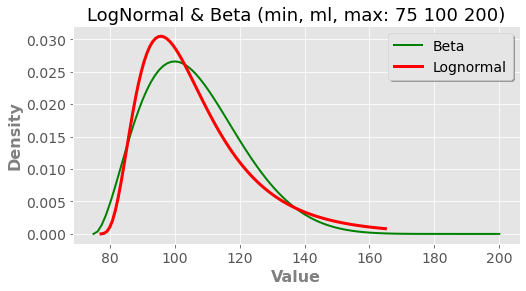

Lognormal shape, Loc & Scale parameters:  0.54 75.00 27.89

Lognormal:
Descriptive Statistics
mean:     106.5878
sem:      0.5532
median:   102.6645
min:      80.1562
max:      208.3002
stdev:    17.4860
skew:     1.7559
kurt:     4.7992
p05:      87.0555
p50:      102.6645
p95:      139.3767
Count     1000


In [5]:
#Lognormal Distribution
from scipy.stats import lognorm
from scipy.stats import gmean

lnmin= min
lnml= ml
lnmax= max

####### USING THE EXTRACTED VALUES FROM THE BETA DISTRIBUTION ########
# Extract the Beta model shape parameters for the lognormal distribution
shape, loc, scale = stats.lognorm.fit(bvals, floc=min)
lnvals =lognorm.rvs(shape, loc=loc, scale=scale, size=size, random_state=None)

# Recalculate the min and max values to fit the lognormal outputs for plotting
lnx = np.linspace(np.min(bvals), np.max(bvals), 100)
lny = lognorm.pdf(lnx, shape, loc=loc, scale=scale)

fig = plt.figure(figsize=(8,4))
plt.plot(bx, by,lw=2, c='g', label='Beta')
plt.plot(lnx, lny, lw=3, c='r', label='Lognormal')
#plt.xlim(lnmin, lnmax)
#plt.yscale('log')
plt.title('LogNormal & Beta (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
#plt.xlim(0, 2000)
plt.legend(fontsize=14, shadow=True)
plt.show()

# Print Descriptive Statistics
print("Lognormal shape, Loc & Scale parameters: ",'%.2f'%shape, '%.2f'%loc, '%.2f'%scale)
print("\n" + "Lognormal:")
my_stats(lnvals)




## Transformation Data to Normal (Box-Cox)
The Box-Cox method solves for an exponent (lambda) that transforms a skewed distribution to normality
- y(λ) = (yλ – 1) / λ  if y ≠ 0
- y(λ) = log(y)  if y = 0

**<u>Types of Normality Tests for PDFs</u>**<br>
    1. Compared the mean and median<br>
    2. Visual inspection of PDFs<br>
    3. Q-Q Probability Plot<br>
    4. Statistical values that test for a critical value (p-value)
- Good Ref: https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411




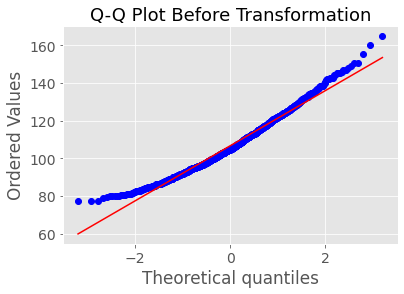

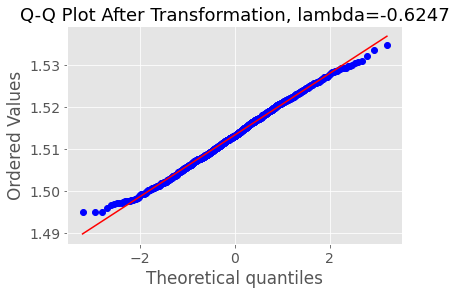

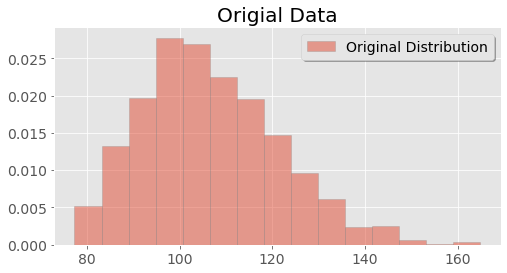

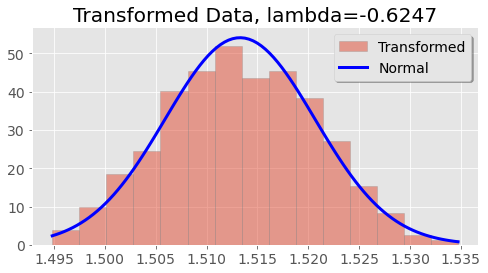

In [6]:
#################################### Test for Log Normality
from scipy.stats import kstest
from scipy.stats import shapiro
import scipy
import pylab
from scipy.stats import boxcox 

#################################
# BOX-COX TRANSFORMATION
#################################
# X values to be evaluated, i.e., bvals, nvals, lnvals as designated at the top of the notebook

if dist_type=='bvals': 
    Xvalue=bvals# <====== CHOOSE EITHER lnvals, nvals or bvals
elif dist_type=='nvals':
    Xvalue=nvals
elif dist_type=='lnvals':
    Xvalue=lnvals

# How to deal with negative values
if np.min(Xvalue) < 0:
    Xvalue = Xvalue + (-1*np.min(Xvalue)+1)

transformed_data, best_lambda = boxcox(Xvalue)     # This does the transformation
############################################

# Q-Q Plot before Transformation
scipy.stats.probplot(Xvalue, dist="norm", plot=pylab)
plt.title('Q-Q Plot Before Transformation', fontsize=18)
pylab.show()

# Q-Q Plot After Transformation
scipy.stats.probplot(transformed_data, dist="norm", plot=pylab)
plt.title('Q-Q Plot After Transformation, lambda=' +str(np.round(best_lambda,4)), fontsize=18)
pylab.show()

# Histogram Before Transformation
fig = plt.figure(figsize=(8,4))
plt.hist(Xvalue, bins=15, edgecolor='gray', density=True, alpha=.5, label='Original Distribution')
plt.title("Origial Data")
plt.legend(fontsize=14, shadow=True)

# Histogram After Transformation
tx=np.linspace(np.min(transformed_data), np.max(transformed_data), 100)
ty=norm.pdf(tx, np.mean(transformed_data), np.std(transformed_data))
fig = plt.figure(figsize=(8,4))
plt.hist(transformed_data, bins=15, edgecolor='gray', density=True, alpha=.5, label='Transformed')
plt.plot(tx, ty, lw=3, c='b', label="Normal")
plt.title('Transformed Data, lambda=' +str(np.round(best_lambda,4)) )
plt.legend(fontsize=14, shadow=True)
plt.show()


### Descriptive Statistics Before and After Transformation

In [7]:
# Statistics  Before and After Transformation
print('Before Transform')
my_stats(Xvalue)
print('\n''After Transform ')
my_stats(transformed_data)


Before Transform
Descriptive Statistics
mean:     106.6905
sem:      0.4676
median:   104.8469
min:      77.3194
max:      164.9064
stdev:    14.7804
skew:     0.5539
kurt:     0.1028
p05:      85.1881
p50:      104.8469
p95:      133.6233
Count     1000

After Transform 
Descriptive Statistics
mean:     1.5133
sem:      0.0002
median:   1.5132
min:      1.4948
max:      1.5347
stdev:    0.0074
skew:     0.0127
kurt:    -0.4498
p05:      1.5011
p50:      1.5132
p95:      1.5255
Count     1000


### Statistical Normality Tests
While there are a number of Normality Tests, they don't all give the same answer. Because a distribution (especially a bounded distribution) my transform to become symmetrical, it is not necessarily "Normal". This is particularly true with Beta distributions with a small Lambda dispersion value. For fun, you can set up the parameters at the top of the notebook to be asymmetical and try a Lambda of 10 versus a Lambda of 4. <br>
For a good review see: https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411
- Note: These normality tests are sensitive to the size of the data.
- I've run the examples at 150 samples
- Jarque-Bera works best with > 2000 samples
- The Kolmogorov-Smirnov is tested against a **Standard Normal** distribution, so the data your testing needs to be standardized, i.e. Z-Score. sklearn has a *processing.scale* function that does this.

In [8]:
from scipy.stats import norm
from scipy.stats import kstest      # Kolmogorov-Smirnov
from scipy.stats import shapiro     # Shapiro-Wilks
from scipy.stats import chisquare   # Chi-Square
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import normaltest  # D'Agnosto Test
from scipy.stats import jarque_bera # Jarque-Bera
from statsmodels.stats.diagnostic import lilliefors #Lillierfors
from sklearn import preprocessing   # Need to standardize the normal distribution, i.e., mean=0, std=1
import numpy as np
import scipy
import pylab
from scipy.stats import boxcox 

########### Data Sets to test against ######################
# By default this section evaluates the Transformed data for above
# But you can other sample distribution by uncommenting sample distribution below
#data = norm.rvs(loc=20, scale=5, size=150, random_state=None)             # Normal Distribution
#data = beta.rvs(1.8, 4.2, loc=75, scale=125, size=150, random_state=None) # Skewed Beta Distribution
#data = beta.rvs(3, 3, loc=75, scale=50, size=150, random_state=None)      # Symmetical Beta Distribution
data=transformed_data                                                      # Default: Distribution specified in input section

# Shapiro-Wilk Normality Test, considered the most powerful test
stat, p = shapiro(data)
print("Shapiro-Wilk Stat & Pvalue: " '%.3f'%stat, '%.3f'%p)
if p >=.05:
    print("Probably Gaussian", "\n")
else:
    print("Probalbly not Gaussian", "\n")

# Anderson Darling
result = anderson(data)
print('Anderson-Darling stat: ' , '%.3f'%stat)
for i in range(len(result.critical_values)):
        sig_lev, crit_val =result.significance_level[i], result.critical_values[i]
        if result.statistic < crit_val:
            print(f'Probably Gaussian : {crit_val} critical value at {sig_lev} level of significance')
        else:
            print(f'probably not Gaussian : {crit_val} critical value at {sig_lev} level of significance')
print('\n')

# Chi-Square Normality Test
cs_stat, cs_p = chisquare(data)
print("chi-Square stat & Pvalue: ", '%.3f'%cs_stat, '%.3f'%cs_p)
if cs_p >=.05:
    print("Probably Gaussian", "\n")
else:
    print("Probalbly not Gaussian", "\n")

# Kolmogorov-Smirnov goodness-of-fit (Takes a different data format)
standard = preprocessing.scale(data)              # converts the data to a z-score 
ks_stat, ks_p = kstest(standard,'norm')
print("Kolmogorv-Smirnov stat & Pvalue: ", '%.3f'%ks_stat, '%.3f'%ks_p)
if ks_p >=.05:
    print("Probably Gaussian", "\n")
else:
    print("Probalbly not Gaussian", "\n")
    
# Lilliefors Normality Test - A version of the Kolmogorov-Smirnov Test
l_stat, l_p = lilliefors(data)
print("Lillifors stat & Pvalue: ", '%.3f'%l_stat, '%.3f'%l_p)
if l_p >=.05:
    print("Probably Gaussian", "\n")
else:
    print("Probalbly not Gaussian", "\n")

# D’Agostino’s K-squared Test
# D’Agostino’s K-squared test check’s normality of a variable based on skewness and kurtosis.
da_stat, da_p = normaltest(data)
print("D'Agnosto stat & Pvalue: ", '%.3f'%da_stat, '%.3f'%da_p)
if da_p >=.05:
    print("Probably Gaussian", "\n")
else:
    print("Probably not Gaussian", "\n")

# Jarque-Bera looks at skewness and Kurtosis matching a normal Distribution
# Works for datasets with > 2000 trials
jb_stat, jb_p = jarque_bera(data)
print("Jarque-Bera stat & Pvalue: ", '%.3f'%jb_stat, '%.3f'%jb_p)
if jb_p >=.05:
    print("Probably Gaussian", "\n")
else:
    print("Probalbly not Gaussian", "\n")


Shapiro-Wilk Stat & Pvalue: 0.996 0.017
Probalbly not Gaussian 

Anderson-Darling stat:  0.996
probably not Gaussian : 0.574 critical value at 15.0 level of significance
Probably Gaussian : 0.653 critical value at 10.0 level of significance
Probably Gaussian : 0.784 critical value at 5.0 level of significance
Probably Gaussian : 0.914 critical value at 2.5 level of significance
Probably Gaussian : 1.088 critical value at 1.0 level of significance


chi-Square stat & Pvalue:  0.036 1.000
Probably Gaussian 

Kolmogorv-Smirnov stat & Pvalue:  0.020 0.809
Probably Gaussian 

Lillifors stat & Pvalue:  0.020 0.513
Probably Gaussian 

D'Agnosto stat & Pvalue:  13.648 0.001
Probably not Gaussian 

Jarque-Bera stat & Pvalue:  8.455 0.015
Probalbly not Gaussian 



## Kolmogorov-Smirnov 2-Sample tests if two distributions are the same
- Compares two distributions and determins if they are the same.
    - For example compare a symmetrical Beta distribution with (L=10) to a Normal - they usually are the same
    - Compare the Lognormal to the Lognormal or the and they are exactly the same


In [9]:
from scipy.stats import ks_2samp

#perform Kolmogorov-Smirnov test
ks_stat, ks_p = ks_2samp(bvals, nvals)        # Inputs are two random sample datasets you want to test

print("Kolmogorv-Smirnov stat & Pvalue: ", '%.3f'%ks_stat, '%.3f'%ks_p)
if ks_p >=.05:
    print("Probably Gaussian", "\n")
else:
    print("Probalbly not Gaussian", "\n")


Kolmogorv-Smirnov stat & Pvalue:  0.186 0.000
Probalbly not Gaussian 

